In [1]:
## Advanced Course in Machine Learning
## Week 3
## Exercise 3 / Spectral clustering

import numpy as np
import scipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import linalg as LA
from sklearn.cluster import KMeans

In [2]:
# Read in the  data
dataFile = "exercise3data.csv"
data = pd.read_csv(dataFile, sep=",", header=None)
# N = 120, D = 2

In [3]:
# print(data)

In [4]:
distances = scipy.spatial.distance.cdist(data, data, metric='euclidean')
distMatrix = pd.DataFrame(distances)
print(distMatrix)

          0         1         2         3         4         5         6    \
0    0.000000  0.103160  0.099020  0.171968  0.249658  0.309535  0.341568   
1    0.103160  0.000000  0.069635  0.121066  0.171304  0.256628  0.260432   
2    0.099020  0.069635  0.000000  0.073430  0.152269  0.212850  0.243836   
3    0.171968  0.121066  0.073430  0.000000  0.088600  0.140118  0.176409   
4    0.249658  0.171304  0.152269  0.088600  0.000000  0.107224  0.091924   
5    0.309535  0.256628  0.212850  0.140118  0.107224  0.000000  0.107224   
6    0.341568  0.260432  0.243836  0.176409  0.091924  0.107224  0.000000   
7    0.364139  0.290264  0.265198  0.193747  0.118962  0.090139  0.042450   
8    0.363094  0.297168  0.264322  0.191128  0.128655  0.066851  0.072402   
9    0.513034  0.452250  0.415477  0.342118  0.283769  0.203745  0.210060   
10   0.467335  0.400485  0.368680  0.295386  0.229993  0.162635  0.151648   
11   0.565680  0.495520  0.466820  0.393732  0.324230  0.261691  0.238799   

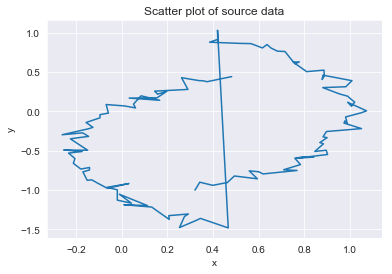

In [5]:
sns.set_style("darkgrid")
plt.plot(data.iloc[:,0], data.iloc[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of source data')
plt.show()

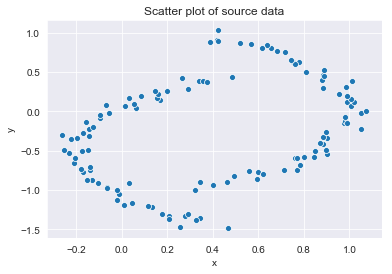

In [6]:
sns.set_style("darkgrid")
sns.scatterplot(data.iloc[:,0], data.iloc[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of source data')
plt.show()

In [7]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)

In [8]:
kmeans.labels_
#kmeans.predict([[0, 0], [12, 3]])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [9]:
kmeans.cluster_centers_

array([[ 0.61246667,  0.29333333],
       [ 0.18971667, -0.80238333]])

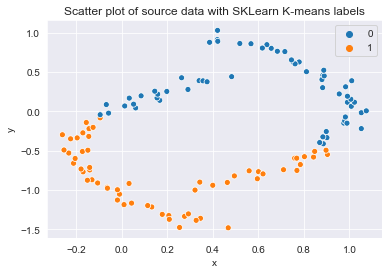

In [10]:
sns.scatterplot(data.iloc[:,0], data.iloc[:,1], hue=kmeans.labels_)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of source data with SKLearn K-means labels')
plt.show()

In [11]:
# Adjacency matrices
e = 0.5
adjMatrixE = distMatrix.apply(lambda x : x <= e)
np.fill_diagonal(adjMatrixE.values, 0)
print(adjMatrixE)

       0      1      2      3      4      5      6      7      8      9    \
0    False   True   True   True   True   True   True   True   True  False   
1     True  False   True   True   True   True   True   True   True   True   
2     True   True  False   True   True   True   True   True   True   True   
3     True   True   True  False   True   True   True   True   True   True   
4     True   True   True   True  False   True   True   True   True   True   
5     True   True   True   True   True  False   True   True   True   True   
6     True   True   True   True   True   True  False   True   True   True   
7     True   True   True   True   True   True   True  False   True   True   
8     True   True   True   True   True   True   True   True  False   True   
9    False   True   True   True   True   True   True   True   True  False   
10    True   True   True   True   True   True   True   True   True   True   
11   False   True   True   True   True   True   True   True   True   True   

In [12]:
A = 8
adjMatrixA = pd.DataFrame(0, index=np.arange(0, 120), columns=np.arange(0, 120), dtype=bool)
closestA = pd.DataFrame()
for i in range(len(distMatrix.iloc[:,0])):
    closestA.insert(i, i, distMatrix.nsmallest(A+1, i).iloc[:,i].drop(distMatrix.index[i]).index)
    for j in range(len(distMatrix.iloc[0,:])):
        #print(j)
        #print(closestA[i])
        if (j in closestA[i].values):
            adjMatrixA.at[i,j] = 1
            adjMatrixA.at[j,i] = 1        

In [13]:
print(adjMatrixA)

       0      1      2      3      4      5      6      7      8      9    \
0    False   True   True   True   True  False  False  False  False  False   
1     True  False   True   True   True   True   True   True   True  False   
2     True   True  False   True   True   True   True   True   True  False   
3     True   True   True  False   True   True   True   True   True  False   
4     True   True   True   True  False   True   True   True   True  False   
5    False   True   True   True   True  False   True   True   True   True   
6    False   True   True   True   True   True  False   True   True   True   
7    False   True   True   True   True   True   True  False   True   True   
8    False   True   True   True   True   True   True   True  False   True   
9    False  False  False  False  False   True   True   True   True  False   
10   False  False  False  False   True   True   True   True   True   True   
11   False  False  False  False  False  False   True   True   True   True   

In [14]:
# Create diagonal matrix D
D_E = pd.DataFrame(0, index=np.arange(0, 120), columns=np.arange(0, 120))
D_A = pd.DataFrame(0, index=np.arange(0, 120), columns=np.arange(0, 120))

for i in range(120):
    D_E.at[i,i] = adjMatrixE.iloc[i,:].sum() 
    D_A.at[i,i] = adjMatrixA.iloc[i,:].sum()

In [15]:
# Laplacians
L_E = D_E - adjMatrixE
L_A = D_A - adjMatrixA

In [16]:
print(L_E)

     0    1    2    3    4    5    6    7    8    9    ...  110  111  112  \
0     30   -1   -1   -1   -1   -1   -1   -1   -1    0  ...    0    0    0   
1     -1   31   -1   -1   -1   -1   -1   -1   -1   -1  ...    0    0    0   
2     -1   -1   29   -1   -1   -1   -1   -1   -1   -1  ...    0    0    0   
3     -1   -1   -1   26   -1   -1   -1   -1   -1   -1  ...    0    0    0   
4     -1   -1   -1   -1   18   -1   -1   -1   -1   -1  ...    0    0    0   
5     -1   -1   -1   -1   -1   18   -1   -1   -1   -1  ...    0    0    0   
6     -1   -1   -1   -1   -1   -1   20   -1   -1   -1  ...    0    0    0   
7     -1   -1   -1   -1   -1   -1   -1   20   -1   -1  ...    0    0    0   
8     -1   -1   -1   -1   -1   -1   -1   -1   20   -1  ...    0    0    0   
9      0   -1   -1   -1   -1   -1   -1   -1   -1   21  ...    0    0    0   
10    -1   -1   -1   -1   -1   -1   -1   -1   -1   -1  ...    0    0    0   
11     0   -1   -1   -1   -1   -1   -1   -1   -1   -1  ...    0    0    0   

In [17]:
print(L_A)

     0    1    2    3    4    5    6    7    8    9    ...  110  111  112  \
0      8   -1   -1   -1   -1    0    0    0    0    0  ...    0    0    0   
1     -1    8   -1   -1   -1   -1   -1   -1   -1    0  ...    0    0    0   
2     -1   -1    8   -1   -1   -1   -1   -1   -1    0  ...    0    0    0   
3     -1   -1   -1    8   -1   -1   -1   -1   -1    0  ...    0    0    0   
4     -1   -1   -1   -1    9   -1   -1   -1   -1    0  ...    0    0    0   
5      0   -1   -1   -1   -1    9   -1   -1   -1   -1  ...    0    0    0   
6      0   -1   -1   -1   -1   -1   10   -1   -1   -1  ...    0    0    0   
7      0   -1   -1   -1   -1   -1   -1   10   -1   -1  ...    0    0    0   
8      0   -1   -1   -1   -1   -1   -1   -1   10   -1  ...    0    0    0   
9      0    0    0    0    0   -1   -1   -1   -1   10  ...    0    0    0   
10     0    0    0    0   -1   -1   -1   -1   -1   -1  ...    0    0    0   
11     0    0    0    0    0    0   -1   -1   -1   -1  ...    0    0    0   

In [18]:
w_E, v_E = LA.eig(L_E)
w_A, v_A = LA.eig(L_A)

In [19]:
eigenvalPD_E = pd.DataFrame(w_E, columns=['eigval'])
eigenvectPD_E = pd.DataFrame(v_E)

eigenvalPD_E = eigenvalPD_E.sort_values(by=['eigval'], ascending=True)
eigenvectPD_E = eigenvectPD_E.transpose()
eigenvectPD_E = eigenvectPD_E.reindex(eigenvalPD_E.index)
eigenvectPD_E = eigenvectPD_E.reset_index(drop=True)
# Eigenvectors in order on rows of the dataframe, smallest at the top

In [20]:
print(eigenvalPD_E)

           eigval
0    2.442491e-15
1    1.242277e+00
2    1.886926e+00
3    4.030331e+00
4    7.466673e+00
5    8.016049e+00
6    1.089923e+01
7    1.217592e+01
9    1.487701e+01
10   1.515714e+01
11   1.617519e+01
12   1.663863e+01
13   1.680241e+01
18   1.751706e+01
19   1.789491e+01
20   1.812714e+01
21   1.854414e+01
22   1.863414e+01
23   1.890071e+01
29   1.939505e+01
30   1.959510e+01
32   1.967882e+01
33   2.003881e+01
34   2.044700e+01
35   2.059202e+01
101  2.100000e+01
108  2.100000e+01
98   2.100000e+01
40   2.115750e+01
42   2.134737e+01
..            ...
63   2.658818e+01
62   2.666151e+01
58   2.670997e+01
56   2.689483e+01
55   2.696543e+01
102  2.700000e+01
54   2.710062e+01
53   2.715855e+01
49   2.733058e+01
48   2.738784e+01
46   2.760597e+01
100  2.800000e+01
99   2.800000e+01
45   2.800643e+01
41   2.822008e+01
39   2.850693e+01
38   2.876281e+01
37   2.881454e+01
36   2.914338e+01
31   2.949925e+01
28   2.979568e+01
27   3.018614e+01
26   3.037436e+01
25   3.066

In [21]:
print(eigenvectPD_E)

              0             1             2             3             4    \
0   -9.128709e-02 -9.128709e-02 -9.128709e-02 -9.128709e-02 -9.128709e-02   
1   -7.667194e-02 -6.770135e-02 -5.919788e-02 -3.404943e-02  1.667357e-02   
2    8.922211e-02  9.169660e-02  9.935530e-02  1.100086e-01  1.295927e-01   
3    6.108696e-02  4.642950e-02  4.007579e-02  6.232824e-03 -7.574104e-02   
4    4.417113e-02  4.822151e-02  6.829335e-02  9.126568e-02  1.443598e-01   
5    7.230726e-03  2.098904e-02  1.583888e-02  3.500266e-02  1.130488e-01   
6   -8.731438e-02 -7.912278e-02 -8.053780e-02 -6.378657e-02 -3.173085e-02   
7   -1.347117e-02 -1.541539e-03 -1.290725e-03  1.782232e-02  9.927930e-02   
8    3.215277e-02  6.442144e-02  5.240859e-02  6.049445e-02  1.659869e-01   
9   -3.341415e-02 -1.846988e-02 -4.622543e-02 -6.474715e-02 -2.018895e-01   
10  -2.120159e-02 -4.056810e-02 -4.841673e-02 -4.341541e-02 -5.119628e-02   
11  -8.063247e-03 -4.494855e-02 -6.829146e-02 -4.524260e-02  5.959783e-02   

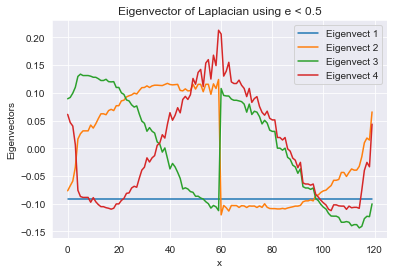

In [22]:
x = range(120)
plt.plot(x, eigenvectPD_E.iloc[0,:])
plt.plot(x, eigenvectPD_E.iloc[1,:])
plt.plot(x, eigenvectPD_E.iloc[2,:])
plt.plot(x, eigenvectPD_E.iloc[3,:])
plt.legend(['Eigenvect 1', 'Eigenvect 2', 'Eigenvect 3', 'Eigenvect 4'], loc='upper right')
plt.xlabel('x')
plt.ylabel('Eigenvectors')
plt.title('Eigenvector of Laplacian using e < {}'.format(e))
plt.show()

In [23]:
eigenvalPD_A = pd.DataFrame(w_A, columns=['eigval'])
eigenvectPD_A = pd.DataFrame(v_A)

eigenvalPD_A = eigenvalPD_E.sort_values(by=['eigval'], ascending=True)
eigenvectPD_A = eigenvectPD_A.transpose()
eigenvectPD_A = eigenvectPD_A.reindex(eigenvalPD_E.index)
eigenvectPD_A = eigenvectPD_A.reset_index(drop=True)
# Eigenvectors in order on rows of the dataframe

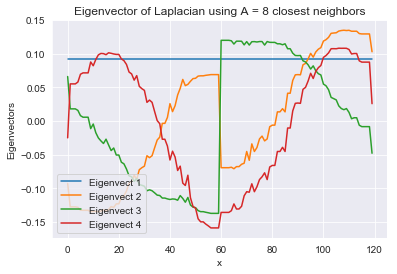

In [24]:
x = range(120)
plt.plot(x, eigenvectPD_A.iloc[0,:])
plt.plot(x, eigenvectPD_A.iloc[1,:])
plt.plot(x, eigenvectPD_A.iloc[2,:])
plt.plot(x, eigenvectPD_A.iloc[3,:])
plt.legend(['Eigenvect 1', 'Eigenvect 2', 'Eigenvect 3', 'Eigenvect 4'], loc='lower left')
plt.xlabel('x')
plt.ylabel('Eigenvectors')
plt.title('Eigenvector of Laplacian using A = {} closest neighbors'.format(A))
plt.show()

In [25]:
M = 4

In [26]:
tr_E = eigenvectPD_E.iloc[0:M,:].transpose()
tr_A = eigenvectPD_A.iloc[0:M,:].transpose()

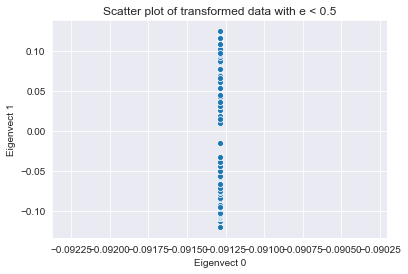

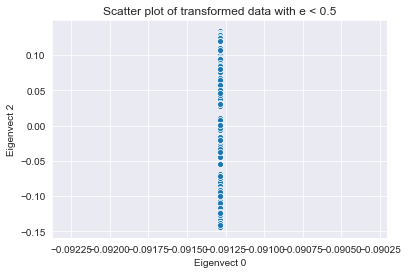

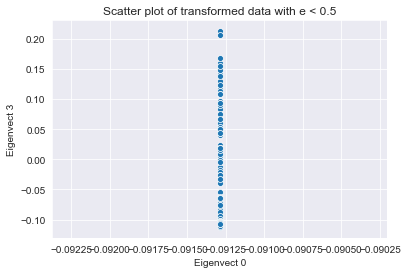

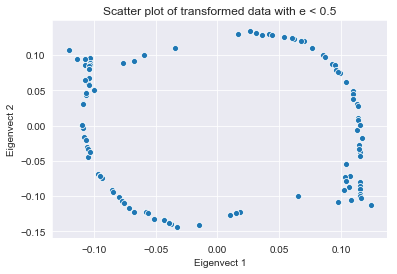

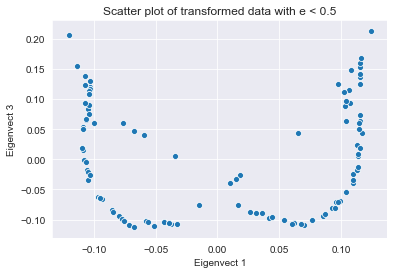

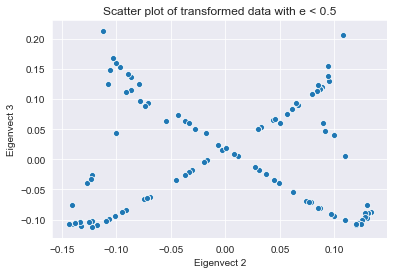

In [27]:
for i in range(M):
    for j in range(M):
        if (i != j and i < j):
            sns.scatterplot(tr_E.iloc[:,i], tr_E.iloc[:,j])
            l1 = 'Eigenvect {}'.format(i)
            l2 = 'Eigenvect {}'.format(j)
            plt.xlabel(l1)
            plt.ylabel(l2)
            plt.title('Scatter plot of transformed data with e < 0.5')
            #plt.legend([l1 , l2])
            plt.show()


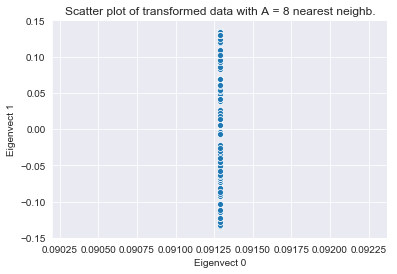

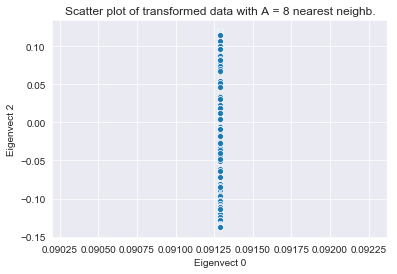

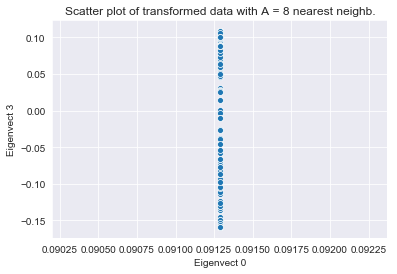

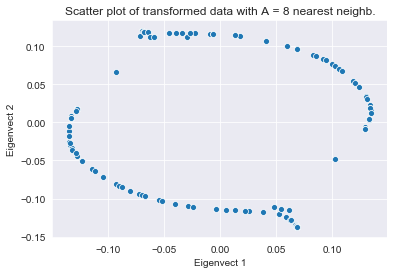

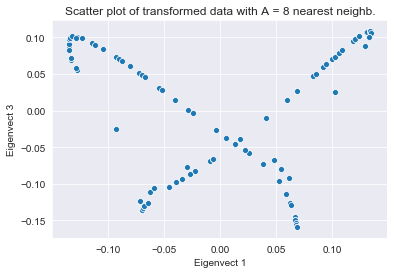

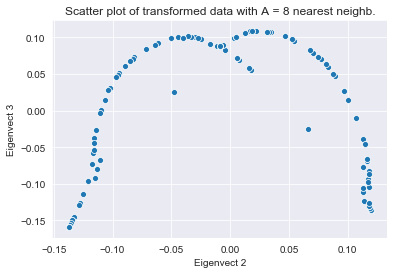

In [28]:
for i in range(M):
    for j in range(M):
        if (i != j and i < j):
            sns.scatterplot(tr_A.iloc[:,i], tr_A.iloc[:,j])
            l1 = 'Eigenvect {}'.format(i)
            l2 = 'Eigenvect {}'.format(j)
            plt.xlabel(l1)
            plt.ylabel(l2)
            plt.title('Scatter plot of transformed data with A = {} nearest neighb.'.format(A))
            #plt.legend([l1 , l2])
            plt.show()


In [29]:
kmeans_E = KMeans(n_clusters=2, random_state=0).fit(tr_E)
kmeans_A = KMeans(n_clusters=2, random_state=0).fit(tr_A)

In [30]:
print(data.shape)
print(tr_E.shape)
print(tr_A.shape)

(120, 2)
(120, 4)
(120, 4)


In [31]:
print(kmeans_A.labels_)

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


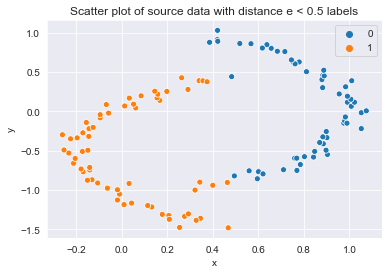

In [32]:
sns.scatterplot(data.iloc[:,0], data.iloc[:,1], hue=kmeans_E.labels_)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of source data with distance e < {} labels'.format(e))
plt.show()

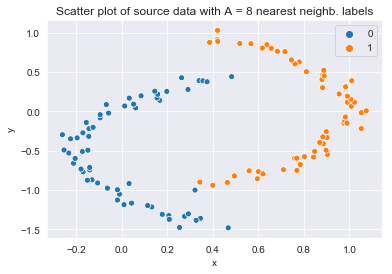

In [33]:
sns.scatterplot(data.iloc[:,0], data.iloc[:,1], hue=kmeans_A.labels_)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of source data with A = {} nearest neighb. labels'.format(A))
plt.show()